In [47]:
#Importing the necessary libraries

import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf

import numpy as np
import seaborn as sns
from tqdm import tqdm
import pandas as pd
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning

import warnings

#in practice do not supress these warnings, they carry important information about the status of your model
warnings.filterwarnings('ignore', category=ValueWarning)
warnings.filterwarnings('ignore', category=HessianInversionWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# Purpose of this notebook #

The purpose of this notebook is purely for my personal academical practice only.

<br>
During the pursuit of my bachelor, I have come across the use of stochastic time series to forecast stock prices, and have been intrigued by the applicability of such methods on the actual market. I will attempt to forecast the stock returns of Apple Inc (APPL), and compare the forecast with the actual returns recorded. Time series models used in this notebook will include <b> MA, AR, ARMA and ARIMA. </b> Other models such as SARIMA, ARCH and GARCH will be be carried out on a seperate notebook in the future. 

In [41]:
#Getting the data
stock_symbol = "AAPL"
start = "2021-01-01"
end = "2021-12-31"

close_price = yf.Ticker(stock_symbol).history(start=start,end=end).Close
returns = close_price.pct_change().dropna()

## Weakly Stationary Process ## 

A Stochastic process is weakly stationary if and only if,

1) The mean is constant, independent of time <br>
2) The autocovariance depends only on time gap. i.e Variance is constant, independent of time

Text(0, 0.5, 'Return')

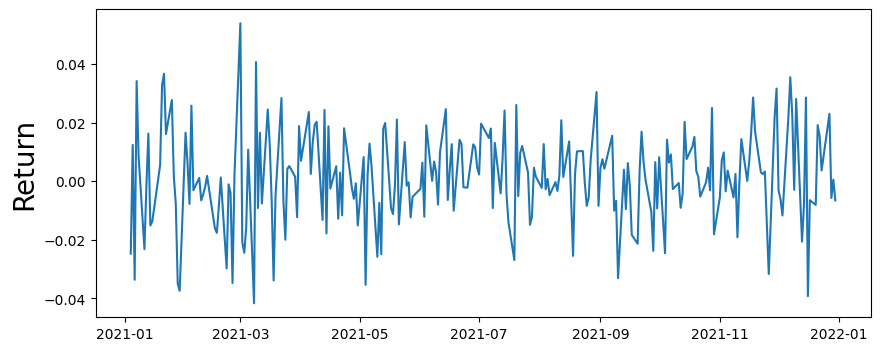

In [42]:
#We can visually verify that the stock returns is similar to a weakly stationary process

plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Return', fontsize=20)

## Moving Average MA(q) process ##

$$
  X_{t} = \beta_{0}Z_{t} + \beta_{1}Z_{t-1} + ... + \beta_{q}Z_{t-q}
$$ 

We use the acf plot to determine order q

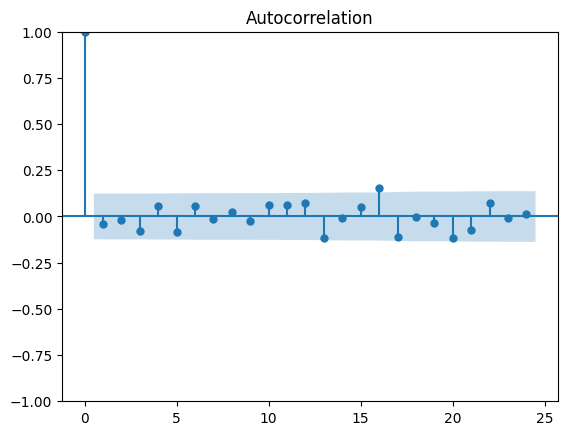

In [43]:
#MA of order 16 

plot_acf(returns)
plt.show()

Therefore, we arrive at the following MA process

$$
  X_{t} = \beta_{0}Z_{t} + \beta_{1}Z_{t-1} + \beta_{2}Z_{t-2} ... + \beta_{16}Z_{t-16}
$$ 

In [44]:
#ARIMA(p,d,q)
#MA(16) is equivalent to ARIMA(0,0,16) process
ma_model = ARIMA(returns, order=(0,0,16)).fit()
ma_prediction = model.forecast()
ma_prediction

251    0.008337
dtype: float64

From the error seen above, "Maximum Likelihood optimization failed to converge. Check mle_retvals". This tells us that this model may not be a good fit for the data

## Autoregressive AR(p) process ##

$$
  X_{t} = Z_{t} + \phi_{1}X_{t-1} + \phi_{2}X_{t-2} ... + \phi_{p}X_{t-p}
$$ 

We use the PACF to determine the order p

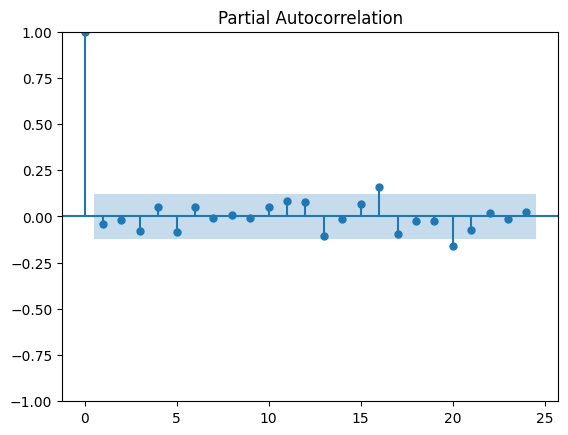

In [48]:
#AR of Order 16
#AR(16)

plot_pacf(returns)
plt.show()

Therefore, we arrive at the following AR process

$$
  X_{t} = Z_{t} + \phi_{1}X_{t-1} + \phi_{2}X_{t-2} ... + \phi_{16}X_{t-16}
$$ 

In [46]:
#ARIMA(p,d,q)
#AR(16) is equivalent to ARIMA(0,0,16) process
ar_model = ARIMA(returns, order=(16,0,0)).fit()
ar_prediction = model.forecast()
ar_prediction

251    0.008337
dtype: float64

## Autoregressive Integrated Moving Average Model, ARIMA(p,d,q) ##

### ARIMA(16,0,16) ###

$$
  X_{t} = \frac{\beta_{0}Z_{t} + \beta_{1}Z_{t-1} + \beta_{2}Z_{t-2} ... + \beta_{16}Z_{t-16}}{Z_{t} + \phi_{1}X_{t-1} + \phi_{2}X_{t-2} ... + \phi_{16}X_{t-16}}
$$ 

In [50]:
#ARIMA(p,d,q)
#AR(16) is equivalent to ARIMA(0,0,16) process
model = ARIMA(returns, order=(16,0,16)).fit()
prediction = model.forecast()
prediction

251    0.01266
dtype: float64